# Match Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Cleaning and Exploration

In [2]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]

In [3]:
matches.shape

(756, 14)

In [4]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

## Taking in Consideration only KXIP VS SRH matches

In [5]:
SK =matches[np.logical_or(np.logical_and(matches['team1']=='Sunrisers Hyderabad',matches['team2']=='Kings XI Punjab'),
                            np.logical_and(matches['team2']=='Sunrisers Hyderabad',matches['team1']=='Kings XI Punjab'))]

In [6]:
SK.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
19,2017,Hyderabad,2017-04-17,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,5,0,B Kumar,"Rajiv Gandhi International Stadium, Uppal"
32,2017,Chandigarh,2017-04-28,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,26,0,Rashid Khan,"Punjab Cricket Association IS Bindra Stadium, ..."
405,2013,Hyderabad,2013-04-19,Kings XI Punjab,Sunrisers Hyderabad,Kings XI Punjab,bat,normal,0,Sunrisers Hyderabad,0,5,GH Vihari,"Rajiv Gandhi International Stadium, Uppal"
440,2013,Chandigarh,2013-05-11,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,30,0,PA Patel,"Punjab Cricket Association Stadium, Mohali"
466,2014,Sharjah,2014-04-22,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kings XI Punjab,72,0,GJ Maxwell,Sharjah Cricket Stadium


In [7]:
SK.shape

(14, 14)

In [8]:
SK.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [9]:
SK.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,14.0,16.500000,21.154196,0.0,0.0,9.0,24.5,72.0
win_by_wickets,14.0,2.071429,2.921124,0.0,0.0,0.0,5.0,7.0


## HEAD TO HEAD

Text(0.5, 1.0, 'SRH VS KXIP-head to head')

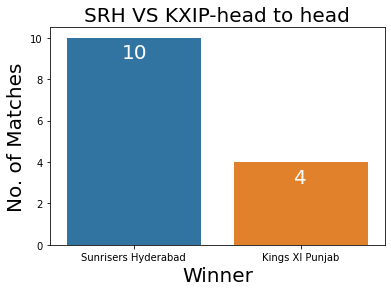

In [10]:
sns.countplot(SK["winner"])
plt.text(-0.07,9,str(SK['winner'].value_counts()['Sunrisers Hyderabad']),size=20,color='white')
plt.text(0.95,3,str(SK['winner'].value_counts()['Kings XI Punjab']),size=20,color='white')
plt.xlabel('Winner',fontsize=20)
plt.ylabel('No. of Matches',fontsize=20)
plt.title('SRH VS KXIP-head to head',fontsize = 20)

In [11]:
Season_wise_Match_Winner = pd.DataFrame(SK.groupby(["season","winner"])["winner"].count())

Season_wise_Match_Winner.columns = ["winner count"]

print("Season wise winner of matches between KXIP VS SRH :")
Season_wise_Match_Winner

Season wise winner of matches between KXIP VS SRH :


winner count
season winner                           
2013   Sunrisers Hyderabad             2
2014   Kings XI Punjab                 2
2015   Sunrisers Hyderabad             2
2016   Sunrisers Hyderabad             2
2017   Sunrisers Hyderabad             2
2018   Kings XI Punjab                 1
       Sunrisers Hyderabad             1
2019   Kings XI Punjab                 1
       Sunrisers Hyderabad             1

## Winning Percentage

In [12]:
Winning_Percentage = SK['winner'].value_counts()/len(SK['winner'])

In [13]:
print("SRH winning percentage against KXIP(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("KXIP winning percentage against SRH(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

SRH winning percentage against KXIP(overall) : 71%
KXIP winning percentage against SRH(overall) : 29%


## Performance Analysis

In [14]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [15]:
performance("Kings XI Punjab",SK)

Number of times given team win while defending : 2
Number of times given team win while chasing   : 2

Average runs by which a given team wins while defending  :  44.0
Average wickets by which a given team wins while chasing :  6.0


In [16]:
performance("Sunrisers Hyderabad",SK)

Number of times given team win while defending : 7
Number of times given team win while chasing   : 3

Average runs by which a given team wins while defending  :  21.0
Average wickets by which a given team wins while chasing :  6.0


## Toss Analysis

In [17]:
Toss_Decision = pd.DataFrame(SK.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision

Toss winner decision :


toss_decision
toss_winner         toss_decision               
Kings XI Punjab     bat                        3
                    field                      8
Sunrisers Hyderabad bat                        1
                    field                      2

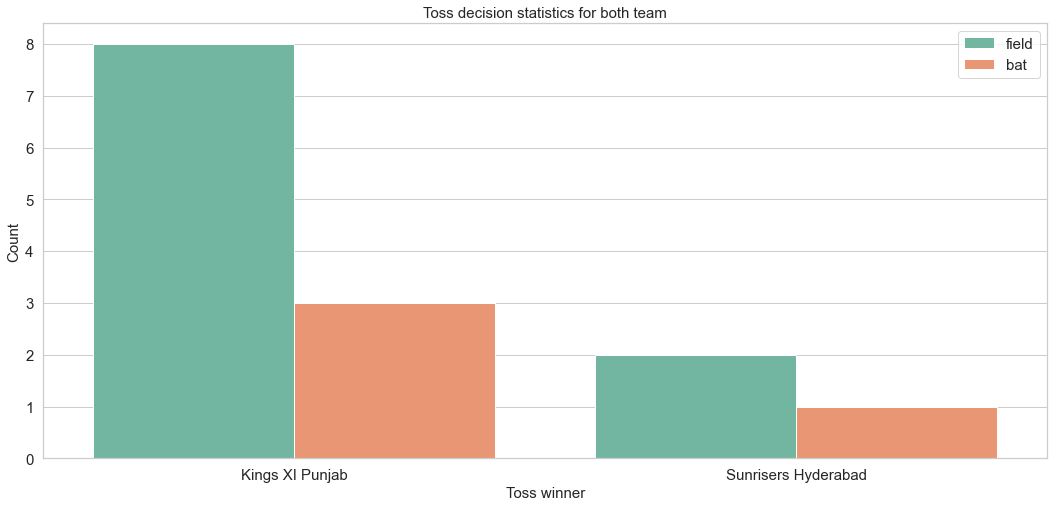

In [18]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(SK['toss_winner'],palette='Set2',hue=SK['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [19]:
Toss_Decision_based_Winner = pd.DataFrame(SK.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner         toss_decision winner                     
Kings XI Punjab     bat           Kings XI Punjab           1
                                  Sunrisers Hyderabad       2
                    field         Kings XI Punjab           2
                                  Sunrisers Hyderabad       6
Sunrisers Hyderabad bat           Sunrisers Hyderabad       1
                    field         Kings XI Punjab           1
                                  Sunrisers Hyderabad       1

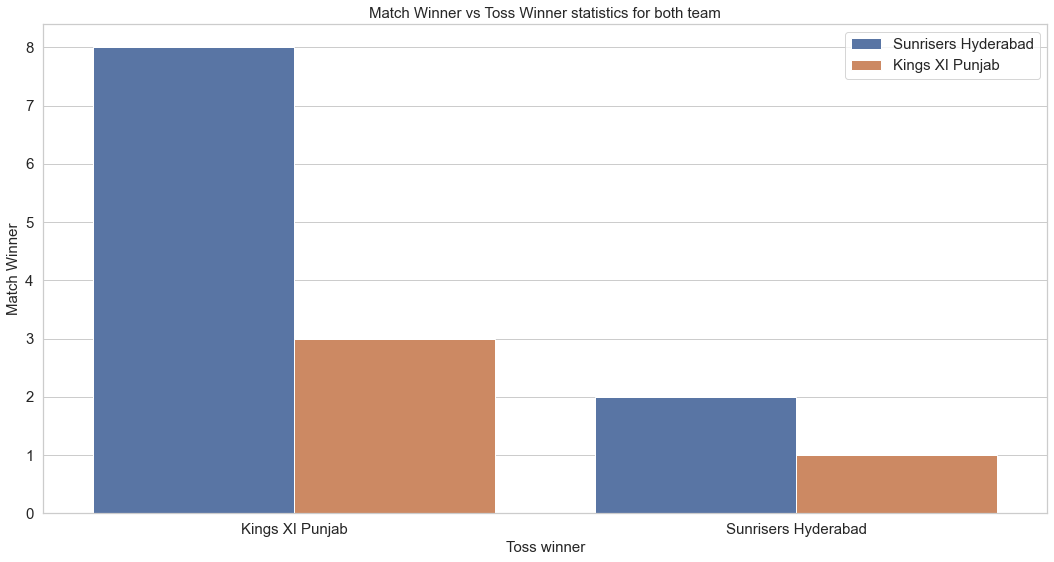

In [20]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(SK['toss_winner'],hue=SK['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

### Toss Decision based Analysis of both the teams seperately :

In [21]:
KXIP = SK[SK["toss_winner"]=="Kings XI Punjab"]
SRH = SK[SK["toss_winner"]=="Sunrisers Hyderabad"]

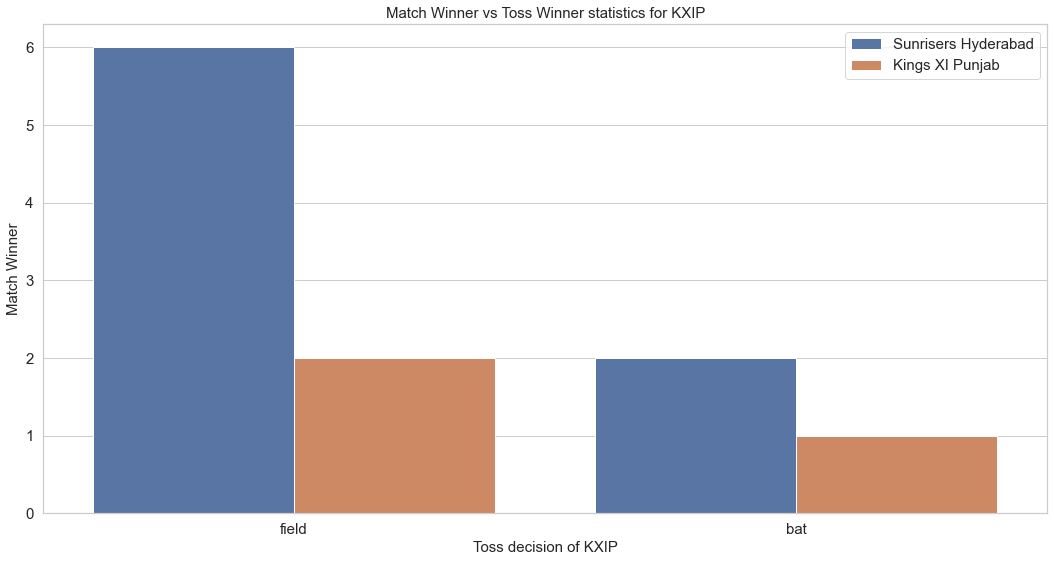

In [22]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(KXIP['toss_decision'],hue=KXIP['winner'])
plt.title('Match Winner vs Toss Winner statistics for KXIP',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of KXIP',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

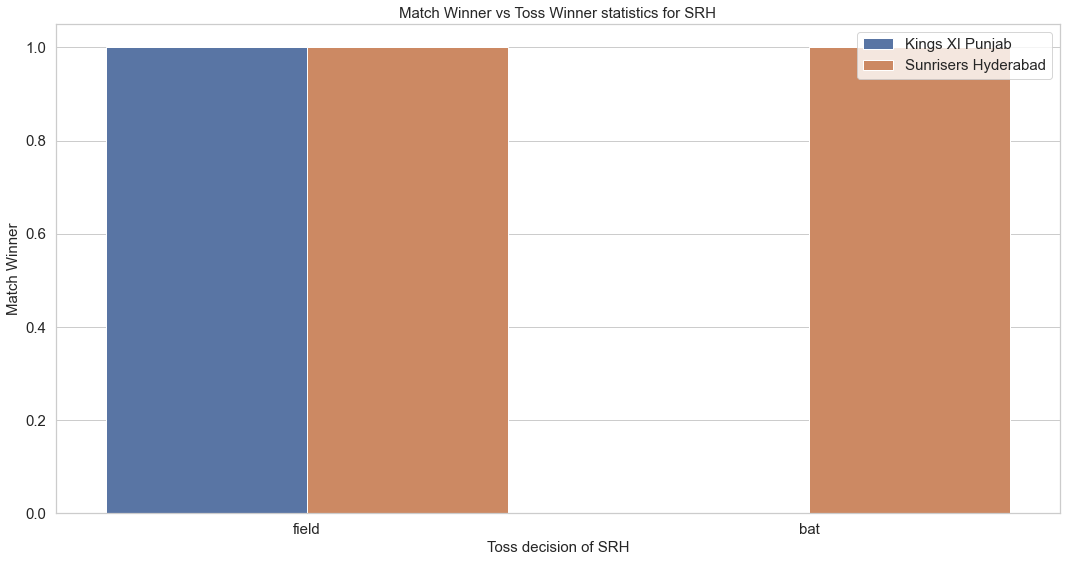

In [23]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(SRH['toss_decision'],hue=SRH['winner'])
plt.title('Match Winner vs Toss Winner statistics for SRH',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of SRH',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

In [24]:
player_of_the_match = pd.DataFrame(SK.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
DA Warner,2
KL Rahul,1
HM Amla,1
AS Rajpoot,1
GJ Maxwell,1
CH Gayle,1
Rashid Khan,1
GH Vihari,1
TA Boult,1
WP Saha,1


## Recent Year Performance Analysis

In [25]:
cond2 = SK["season"] == 2018
cond3 = SK["season"] == 2019
final = SK[cond2 | cond3]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7909,2018,Mohali,19/04/18,Kings XI Punjab,Sunrisers Hyderabad,Kings XI Punjab,bat,normal,0,Kings XI Punjab,15,0,CH Gayle,"Punjab Cricket Association IS Bindra Stadium, ..."
7918,2018,Hyderabad,26/04/18,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,13,0,AS Rajpoot,"Rajiv Gandhi International Stadium, Uppal"
11313,2019,Mohali,08/04/19,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium
11339,2019,Hyderabad,29/04/19,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,45,0,DA Warner,Rajiv Gandhi Intl. Cricket Stadium


In [26]:
final.shape

(4, 14)

In [27]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
KL Rahul,1
CH Gayle,1
AS Rajpoot,1
DA Warner,1


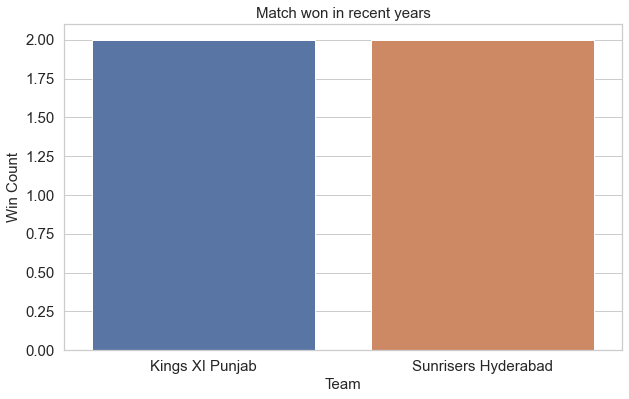

In [28]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)

plt.show()

From all the analysis related to Head to Head , toss decision , match winner , Performance based analysis etc we can predict that SRH to be favorite for this match.